In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
test_df=pd.read_excel('Test_set.xlsx')
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
# Appending both the datasets

final_df=train_df.append(test_df)

# Appending is done to work with both the train and test datasets at the same time.

In [5]:
final_df.dtypes

Additional_Info     object
Airline             object
Arrival_Time        object
Date_of_Journey     object
Dep_Time            object
Destination         object
Duration            object
Price              float64
Route               object
Source              object
Total_Stops         object
dtype: object

In [6]:
final_df.shape

(13354, 11)

In [7]:
# transforming the data

In [9]:
# Working on Date_of_Journey Column

# Splitting the column into Date,Month & Year

final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]


In [15]:
# Working on Arrival_Time Column

# Arrival_Time column has both the time and month details but we need only time details

# so we shall split the time into Hours and Minutes

final_df['Arrival_Time']=final_df['Arrival_Time'].str.split(' ').str[0]

In [16]:
final_df['Arrival_Hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_Minutes']=final_df['Arrival_Time'].str.split(':').str[1]



In [23]:
final_df['Arrival_Hour']=pd.to_numeric(final_df['Arrival_Hour'],errors='coerce')
final_df = final_df.replace(np.nan, 0, regex=True)
final_df['Arrival_Hour'] = final_df['Arrival_Hour'].astype(int)

# Converting the column to integer type


In [24]:
final_df['Arrival_Minutes']=pd.to_numeric(final_df['Arrival_Minutes'],errors='coerce')
final_df = final_df.replace(np.nan, 0, regex=True)
final_df['Arrival_Minutes'] = final_df['Arrival_Minutes'].astype(int)

# Converting the column to integer type


In [25]:
# Working on Total_Stops column

final_df['Total_Stops']=final_df['Total_Stops'].replace('non-stop','0-stop')

In [26]:
final_df['Stop']=final_df['Total_Stops'].str.split('').str[0]

In [27]:
# converting the column to integer type

final_df['Stop']=pd.to_numeric(final_df['Stop'],errors='coerce')
final_df = final_df.replace(np.nan, 0, regex=True)
final_df['Stop'] = final_df['Stop'].astype(int)



In [28]:
# Working on Dep_Time Column

# Splitting this column into hour and minutes and converting it into integer

final_df['Dep_Hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_Minutes']=final_df['Dep_Time'].str.split(':').str[1]

In [29]:
final_df['Dep_Hour']=pd.to_numeric(final_df['Dep_Hour'],errors='coerce')
final_df = final_df.replace(np.nan, 0, regex=True)
final_df['Dep_Hour'] = final_df['Dep_Hour'].astype(int)

# Converting the column to integer type


In [30]:
final_df['Dep_Minutes']=pd.to_numeric(final_df['Dep_Minutes'],errors='coerce')
final_df = final_df.replace(np.nan, 0, regex=True)
final_df['Dep_Minutes'] = final_df['Dep_Minutes'].astype(int)

# Converting the column to integer type

In [31]:
# Dropping the Dep_Time column

final_df.drop('Dep_Time',axis=1,inplace=True)

In [32]:
# Working on the route column

# Splitting the route column into 5 variables

final_df['Route_1']=final_df['Route'].str.split('→ ').str[0]
final_df['Route_2']=final_df['Route'].str.split('→ ').str[1]
final_df['Route_3']=final_df['Route'].str.split('→ ').str[2]
final_df['Route_4']=final_df['Route'].str.split('→ ').str[3]
final_df['Route_5']=final_df['Route'].str.split('→ ').str[4]

In [33]:
final_df['Route_1'].fillna("None",inplace=True)
final_df['Route_2'].fillna("None",inplace=True)
final_df['Route_3'].fillna("None",inplace=True)
final_df['Route_4'].fillna("None",inplace=True)
final_df['Route_5'].fillna("None",inplace=True)

# Replacing the Nan values with None

In [ ]:
# Coding the categorical variables using label encoder

In [34]:

from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()
# df['Region']=le.fit_transform(df['Region])

final_df['Additional_Info']=le.fit_transform(final_df['Additional_Info'])
final_df['Airline']=le.fit_transform(final_df['Airline'])
final_df['Source']=le.fit_transform(final_df['Source'])
final_df['Route_1']=le.fit_transform(final_df['Route_1'])
final_df['Route_2']=le.fit_transform(final_df['Route_2'])
final_df['Route_3']=le.fit_transform(final_df['Route_3'])
final_df['Route_4']=le.fit_transform(final_df['Route_4'])
final_df['Route_5']=le.fit_transform(final_df['Route_5'])

In [37]:
final_df

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Destination,Duration,Price,Route,Source,Total_Stops,...,Arrival_Hour,Arrival_Minutes,Stop,Dep_Hour,Dep_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,8,3,,24/03/2019,New Delhi,2h 50m,3897.0,BLR → DEL,0,0-stop,...,0,0,0,22,20,0,13,24,12,4
1,8,1,,1/05/2019,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,3,2 stops,...,0,0,0,5,50,2,25,1,3,4
2,8,4,,9/06/2019,Cochin,19h,13882.0,DEL → LKO → BOM → COK,2,2 stops,...,0,0,0,9,25,3,32,4,5,4
3,8,3,,12/05/2019,Banglore,5h 25m,6218.0,CCU → NAG → BLR,3,1 stop,...,0,0,0,18,5,2,34,3,12,4
4,8,3,,01/03/2019,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,0,1 stop,...,0,0,0,16,50,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,8,1,,6/06/2019,Banglore,23h 55m,0.0,CCU → DEL → BLR,3,1 stop,...,0,0,0,20,30,2,14,3,12,4
2667,8,3,,27/03/2019,Banglore,2h 35m,0.0,CCU → BLR,3,0-stop,...,0,0,0,14,20,2,5,24,12,4
2668,8,4,,6/03/2019,Cochin,6h 35m,0.0,DEL → BOM → COK,2,1 stop,...,0,0,0,21,50,3,7,6,12,4
2669,8,1,,6/03/2019,Cochin,15h 15m,0.0,DEL → BOM → COK,2,1 stop,...,0,0,0,4,0,3,7,6,12,4


In [38]:
final_df.dtypes

Additional_Info      int32
Airline              int32
Arrival_Time        object
Date_of_Journey     object
Destination         object
Duration            object
Price              float64
Route               object
Source               int32
Total_Stops         object
Date                object
Month               object
Year                object
Arrival_Hour         int32
Arrival_Minutes      int32
Stop                 int32
Dep_Hour             int32
Dep_Minutes          int32
Route_1              int32
Route_2              int32
Route_3              int32
Route_4              int32
Route_5              int32
dtype: object

In [74]:
final_df.columns

Index(['Additional_Info', 'Airline', 'Arrival_Time', 'Date_of_Journey',
       'Destination', 'Duration', 'Price', 'Route', 'Source', 'Total_Stops',
       'Date', 'Month', 'Year', 'Arrival_Hour', 'Arrival_Minutes', 'Stop',
       'Dep_Hour', 'Dep_Minutes', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [39]:
final_df.isnull().sum()

Additional_Info    0
Airline            0
Arrival_Time       0
Date_of_Journey    0
Destination        0
Duration           0
Price              0
Route              0
Source             0
Total_Stops        0
Date               0
Month              0
Year               0
Arrival_Hour       0
Arrival_Minutes    0
Stop               0
Dep_Hour           0
Dep_Minutes        0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [ ]:
# There are no null values

In [41]:
# Converting all String or Object data to numeric types

list1=['Arrival_Time','Date_of_Journey','Destination','Duration','Route','Total_Stops','Date','Month','Year']
for val in list1:
    final_df[val]=le.fit_transform(final_df[val].astype(str))

In [85]:
# Summary of Statistics

final_df.describe()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Destination,Duration,Price,Route,Source,Total_Stops,...,Arrival_Hour,Arrival_Minutes,Stop,Dep_Hour,Dep_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
count,13354.000000,13354.000000,13354.0,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,...,13354.0,13354.0,13354.0,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,7.407743,3.977086,0.0,23.720608,1.435450,195.868129,7269.515201,78.429534,1.954096,1.825895,...,0.0,0.0,0.0,12.513254,24.507264,2.015651,11.915681,11.571664,10.938071,3.987345
std,1.198393,2.363997,0.0,12.377232,1.473368,111.141733,5497.704856,38.260255,1.178607,0.674792,...,0.0,0.0,0.0,5.736273,18.832385,1.205399,8.035899,9.035316,2.602641,0.203479
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,3.000000,0.0,14.000000,0.000000,103.000000,3625.000000,50.000000,2.000000,1.000000,...,0.0,0.0,0.0,8.000000,5.000000,1.000000,7.000000,4.000000,12.000000,4.000000
50%,8.000000,4.000000,0.0,24.000000,1.000000,235.000000,6860.000000,77.000000,2.000000,2.000000,...,0.0,0.0,0.0,11.000000,25.000000,2.000000,7.000000,6.000000,12.000000,4.000000
75%,8.000000,4.000000,0.0,35.000000,2.000000,284.000000,11087.000000,109.000000,3.000000,2.000000,...,0.0,0.0,0.0,18.000000,40.000000,3.000000,14.000000,24.000000,12.000000,4.000000
max,9.000000,11.000000,0.0,43.000000,5.000000,373.000000,79512.000000,132.000000,4.000000,5.000000,...,0.0,0.0,0.0,23.000000,55.000000,5.000000,45.000000,30.000000,13.000000,5.000000


# Checking out the Correlation

In [87]:
dfcor=final_df.corr()
dfcor

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Destination,Duration,Price,Route,Source,Total_Stops,...,Arrival_Hour,Arrival_Minutes,Stop,Dep_Hour,Dep_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
Additional_Info,1.000000,-0.058533,NaN,0.013295,0.027398,0.074230,-0.060724,0.035906,-0.022219,-0.079180,...,NaN,NaN,NaN,-0.054881,-0.013346,0.016371,0.080519,0.167932,-0.045448,-0.031968
Airline,-0.058533,1.000000,NaN,0.021171,0.022130,0.028354,-0.032627,0.020773,-0.018547,-0.206015,...,NaN,NaN,NaN,-0.026127,-0.057826,0.030980,-0.065605,0.056186,0.269585,0.054978
Arrival_Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,0.013295,0.021171,NaN,1.000000,-0.270748,-0.002389,-0.023161,0.269986,0.163327,0.056233,...,NaN,NaN,NaN,-0.008422,-0.049489,0.258003,0.010755,-0.063606,-0.047231,0.006595
Destination,0.027398,0.022130,NaN,-0.270748,1.000000,0.012843,-0.047166,-0.475765,-0.589710,-0.294038,...,NaN,NaN,NaN,-0.068252,0.133008,-0.491042,0.077796,0.422699,0.135773,0.018383
Duration,0.074230,0.028354,NaN,-0.002389,0.012843,1.000000,-0.088057,-0.057235,-0.185234,-0.170455,...,NaN,NaN,NaN,0.046484,0.029800,-0.065586,0.017829,0.167383,0.091833,-0.004339
Price,-0.060724,-0.032627,NaN,-0.023161,-0.047166,-0.088057,1.000000,0.116078,0.008662,0.401839,...,NaN,NaN,NaN,-0.000617,-0.023122,0.126655,-0.058324,-0.384394,-0.210391,-0.034418
Route,0.035906,0.020773,NaN,0.269986,-0.475765,-0.057235,0.116078,1.000000,0.410081,0.458673,...,NaN,NaN,NaN,-0.082761,-0.066750,0.981948,0.082231,-0.476113,-0.238522,-0.032297
Source,-0.022219,-0.018547,NaN,0.163327,-0.589710,-0.185234,0.008662,0.410081,1.000000,0.191083,...,NaN,NaN,NaN,0.058471,-0.058563,0.439608,0.038281,-0.276999,-0.078368,-0.013664
Total_Stops,-0.079180,-0.206015,NaN,0.056233,-0.294038,-0.170455,0.401839,0.458673,0.191083,1.000000,...,NaN,NaN,NaN,-0.070554,-0.000357,0.430558,0.159748,-0.778416,-0.725424,-0.199310


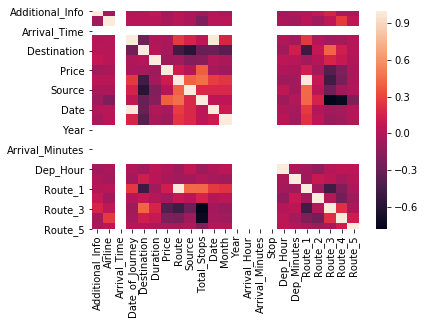

In [88]:
sns.heatmap(dfcor)

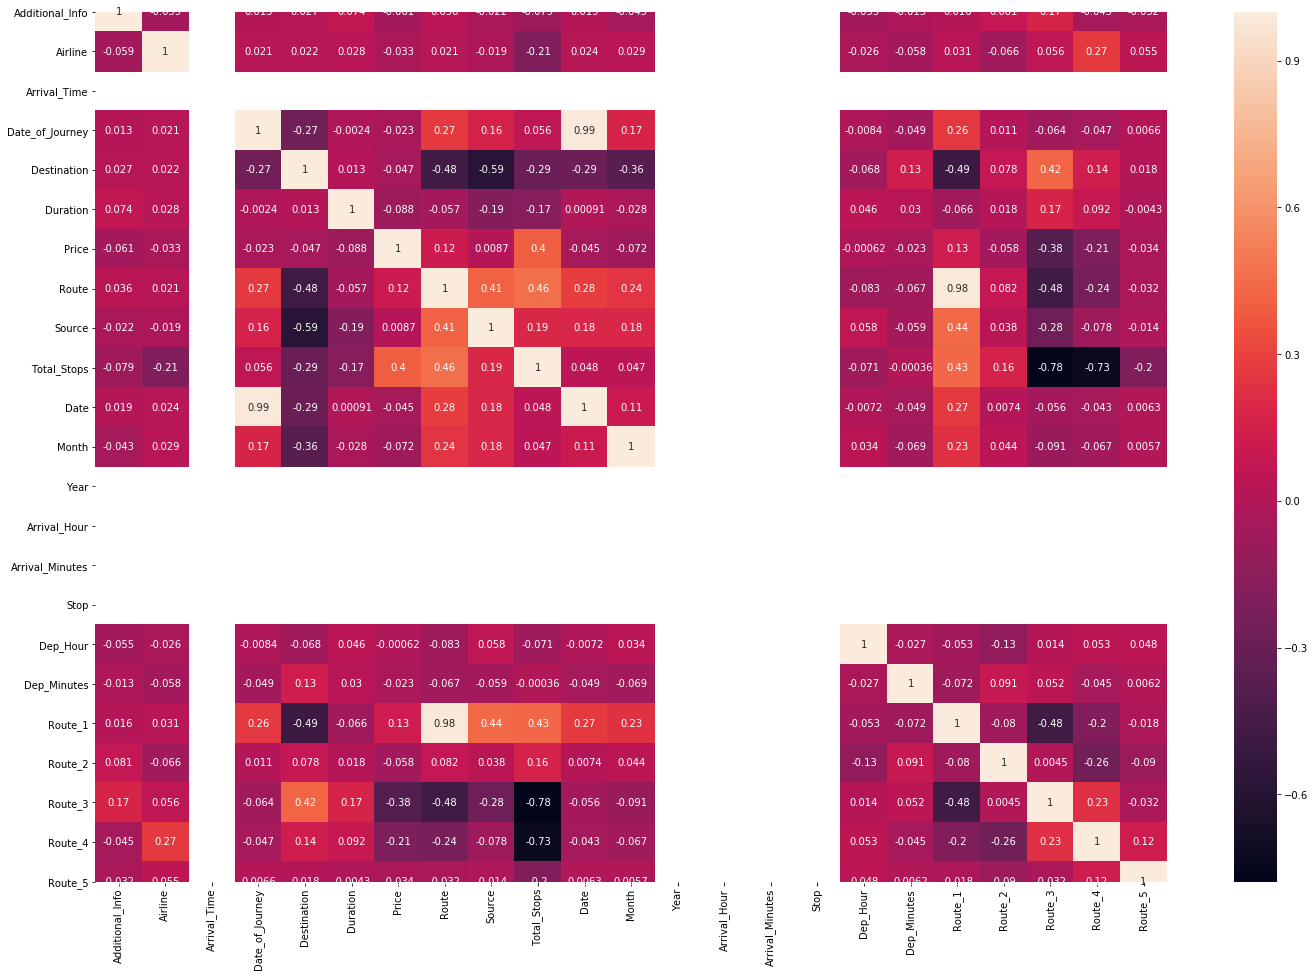

In [89]:
plt.figure(figsize=(24,16))
sns.heatmap(dfcor,annot=True)

# Plotting the histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A800C55C8>,
      dtype=object)

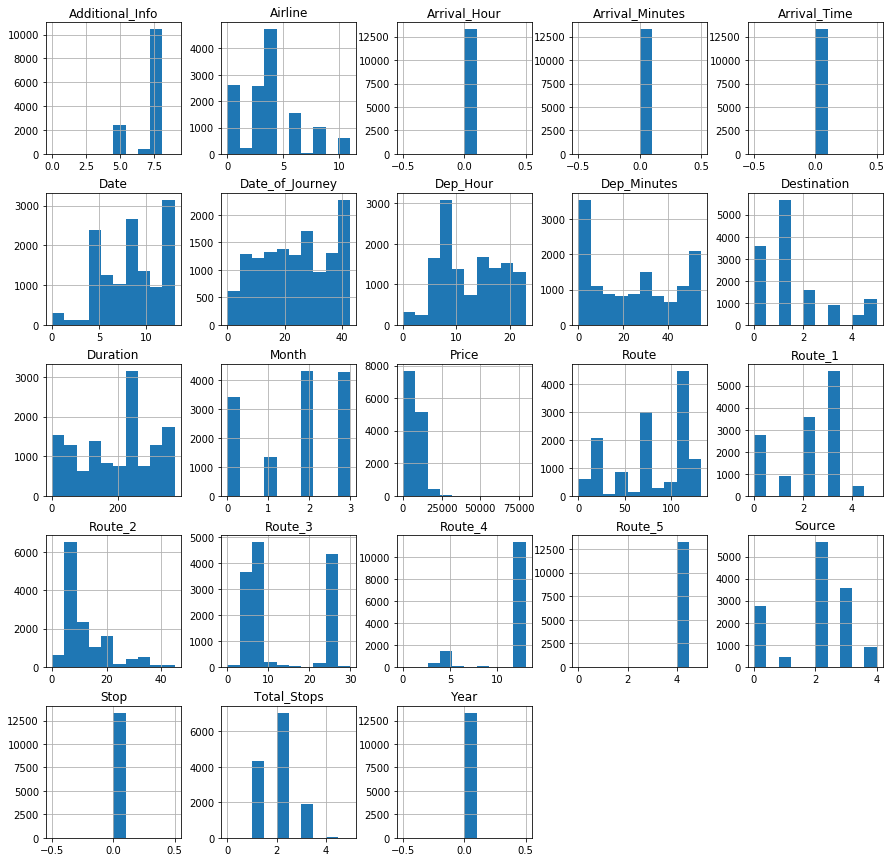

In [91]:
final_df.hist(figsize=(15,15))

# Bivariate Analysis

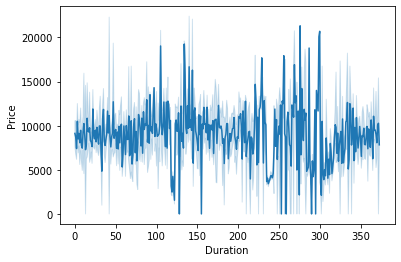

In [92]:
# Duration vs Price

sns.lineplot(x=final_df['Duration'],y=final_df['Price'],data=final_df)
plt.show()

In [43]:
# Splitting the data into test and train

# Dropping the price column from the test data set

df_train=final_df[0:10683]
df_test=final_df[10683:]
df_test.drop('Price',axis=1,inplace=True)


In [44]:
x=df_train.drop(['Price'],axis=1)
y=df_train[['Price']]

In [45]:
# Scaling down using a standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2 score corresponding to:',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
            
    print('Maximum r2 score corresponding to:',final_r_state,'is:',max_r_score)
    return final_r_state

In [47]:
# Lets use Linear Regression and check max r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)


r2 score corresponding to: 42 is 0.5536494534593166
r2 score corresponding to: 43 is 0.5225008003407587
r2 score corresponding to: 44 is 0.5309849302214809
r2 score corresponding to: 45 is 0.48079792495219975
r2 score corresponding to: 46 is 0.5345693538070936
r2 score corresponding to: 47 is 0.548777275149396
r2 score corresponding to: 48 is 0.5025790627825113
r2 score corresponding to: 49 is 0.5689340824012201
r2 score corresponding to: 50 is 0.541831611199499
r2 score corresponding to: 51 is 0.5262857321438927
r2 score corresponding to: 52 is 0.5354456506759452
r2 score corresponding to: 53 is 0.5117140121291571
r2 score corresponding to: 54 is 0.5613161368072499
r2 score corresponding to: 55 is 0.5132342042325895
r2 score corresponding to: 56 is 0.5103693808213331
r2 score corresponding to: 57 is 0.5200486306974634
r2 score corresponding to: 58 is 0.5361220094299952
r2 score corresponding to: 59 is 0.5439030983378079
r2 score corresponding to: 60 is 0.5296762898560935
r2 score corr

In [48]:
# Lets use grid_search to find the optimal value of n_neighbors for KNN  model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 3}

In [49]:
# Lets use KNN regression and check maximum r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=3)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to: 42 is 0.7515305719953176
r2 score corresponding to: 43 is 0.7291117604464742
r2 score corresponding to: 44 is 0.7106639733758755
r2 score corresponding to: 45 is 0.6932952973275117
r2 score corresponding to: 46 is 0.7472733556205619
r2 score corresponding to: 47 is 0.776282511741019
r2 score corresponding to: 48 is 0.7341413959098139
r2 score corresponding to: 49 is 0.7700402702304008
r2 score corresponding to: 50 is 0.762979817958602
r2 score corresponding to: 51 is 0.733323722737071
r2 score corresponding to: 52 is 0.7747207918593252
r2 score corresponding to: 53 is 0.7186111485256793
r2 score corresponding to: 54 is 0.7530712073640009
r2 score corresponding to: 55 is 0.7044542452926431
r2 score corresponding to: 56 is 0.7231005833107302
r2 score corresponding to: 57 is 0.7375011458110314
r2 score corresponding to: 58 is 0.6636155146479246
r2 score corresponding to: 59 is 0.7508994080833609
r2 score corresponding to: 60 is 0.7752610428054805
r2 score corres

In [50]:
# Lets check the mean r2 score of both linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for linear regression: ', cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print('Mean r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').std())


Mean r2 score for linear regression:  0.5346902568293131
Standard deviation in r2 score for Linear Regression: 0.012420304022875198

Mean r2 score for KNN Regression: 0.767792114269977
Standard deviation in r2 score for KNN Regression: 0.019881087075033343


In [51]:
# Lets check Lasso Regression and the best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [52]:
# Lets check the maximum r2 score when we use Lasso
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to: 42 is 0.5535929724040358
r2 score corresponding to: 43 is 0.5224852625032026
r2 score corresponding to: 44 is 0.5309766418750305
r2 score corresponding to: 45 is 0.48080317752230295
r2 score corresponding to: 46 is 0.5345803233219477
r2 score corresponding to: 47 is 0.5487836603061902
r2 score corresponding to: 48 is 0.5025616288473883
r2 score corresponding to: 49 is 0.5689325259308158
r2 score corresponding to: 50 is 0.5418391078379212
r2 score corresponding to: 51 is 0.5263164289852367
r2 score corresponding to: 52 is 0.5354693614654928
r2 score corresponding to: 53 is 0.5116864385250521
r2 score corresponding to: 54 is 0.5613196267572103
r2 score corresponding to: 55 is 0.5132197087863051
r2 score corresponding to: 56 is 0.5103430956316444
r2 score corresponding to: 57 is 0.5200666325790633
r2 score corresponding to: 58 is 0.5360763639346422
r2 score corresponding to: 59 is 0.5439495550156874
r2 score corresponding to: 60 is 0.529684035799981
r2 score cor

In [53]:
# Lets use the cross val score with Lasso

print('Mean r2 score for Lasso regression: ', cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Lasso Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())




Mean r2 score for Lasso regression:  0.534690679204417
Standard deviation in r2 score for Lasso Regression: 0.012420304022875198


In [54]:
# Now we will try to use the gradient boosting technique

# For getting the best set of parameters we will use grid search

from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [55]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to: 42 is 0.8982888645861348
r2 score corresponding to: 43 is 0.9017041710861877
r2 score corresponding to: 44 is 0.903964123316247
r2 score corresponding to: 45 is 0.8450817063245071
r2 score corresponding to: 46 is 0.8776771059018237
r2 score corresponding to: 47 is 0.8778284006712528
r2 score corresponding to: 48 is 0.869391531290885
r2 score corresponding to: 49 is 0.9064986480810502
r2 score corresponding to: 50 is 0.8686771444700236
r2 score corresponding to: 51 is 0.9168885535671132
r2 score corresponding to: 52 is 0.8874553370890934
r2 score corresponding to: 53 is 0.8664023171772519
r2 score corresponding to: 54 is 0.8610834644237328
r2 score corresponding to: 55 is 0.8107492289295644
r2 score corresponding to: 56 is 0.8784868129152876
r2 score corresponding to: 57 is 0.9006055255766623
r2 score corresponding to: 58 is 0.9173959282098431
r2 score corresponding to: 59 is 0.8782726820160115
r2 score corresponding to: 60 is 0.869750352219597
r2 score corres

In [56]:
# Now we will use the cross_val_score to check the mean r2 score and standard deviation

print('Mean r2 score for Gradient boosting regression: ', cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Gradient boosting regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())


Mean r2 score for Gradient boosting regression:  0.8895896905437205
Standard deviation in r2 score for Gradient boosting regression: 0.007352677208113256


In [59]:
# Now lets use adaboost regression algorithm

# Adaboost Regression Algorithm doesn't respond with the best parameters due to the large dataset. System gets hanged

# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# ada_reg=AdaBoostRegressor()
# parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
# clf=GridSearchCV(ada_reg,parameters,cv=5)
# clf.fit(x,y)
# clf.best_params

In [60]:
# We tried all the models and found that Gradient boosting regressor is the best
# Random state corresponding to highest r2 score is 58

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=58,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [61]:
# Lets find the rmse and r2 score using sklearn.metrics

import numpy as np

print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2 score is:',r2_score(y_test,y_pred))

RMSE is: 1749.2282498138707
r2 score is: 0.8667908632543477


In [62]:
from sklearn.externals import joblib

# Save the model as a pickle in a file

joblib.dump(gbr,'Ticket_price_prediction.obj')

['Ticket_price_prediction.obj']

In [78]:
# load the model from the file

gbr_from_joblib=joblib.load('Ticket_price_prediction.obj')

# Use the loaded model to make predictions

gbr_from_joblib.predict(x_test)

array([ 6598.41052332,  4912.09730745,  4766.10249368, ...,
       10551.78648111,  9582.94005768,  4960.09077111])

In [81]:
df_test_gbr=df_test[['Additional_Info', 'Airline', 'Arrival_Time', 'Date_of_Journey',
       'Destination', 'Duration',  'Route', 'Source', 'Total_Stops',
       'Date', 'Month', 'Year', 'Arrival_Hour', 'Arrival_Minutes', 'Stop',
       'Dep_Hour', 'Dep_Minutes', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5']]
preds_1=gbr.predict(df_test_gbr)
df_test_gbr['Price']=preds_1
df_test_gbr.to_csv('flight_price.csv')

In [84]:
print("Predicted flight price:", preds_1)

Predicted flight price: [16581.11827844 16581.11827844 16581.11827844 ... 17075.40004417
 18573.28911526 16581.11827844]
